### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from prophet import Prophet

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### Emission

In [2]:
Emission_dataset = pd.read_excel('Emission_Dataset.xlsx')

In [3]:
Emission_dataset.head(20)

,Country,CountryCode,ds,China_yhat,Egypt_yhat,Morocco_yhat,Nigeria_yhat,SouthAfrica_yhat,UnitedKingdom_yhat,UnitedStatesofAmerica_yhat
0,Global,GLB,2000-01-01,672.366,453.203,735.367,315.194,759.709,483.199,532.606
1,Global,GLB,2001-01-01,654.880,446.012,730.986,319.407,766.409,486.728,535.533
2,Global,GLB,2002-01-01,663.277,455.017,735.488,318.336,761.874,481.565,526.956
3,Global,GLB,2003-01-01,677.915,455.570,711.772,325.065,769.153,493.577,532.299
4,Global,GLB,2004-01-01,667.900,449.226,709.714,341.505,765.116,494.825,529.099
5,Global,GLB,2005-01-01,670.506,460.838,701.119,342.210,771.006,493.450,530.787
6,Global,GLB,2006-01-01,676.615,461.370,702.647,371.597,774.894,511.920,522.156
7,Global,GLB,2007-01-01,679.410,453.696,701.655,371.063,774.239,513.436,525.213
8,Global,GLB,2008-01-01,649.673,463.110,700.611,369.911,771.902,515.279,518.707
9,Global,GLB,2009-01-01,658.037,477.482,638.861,390.011,773.575,471.856,496.546


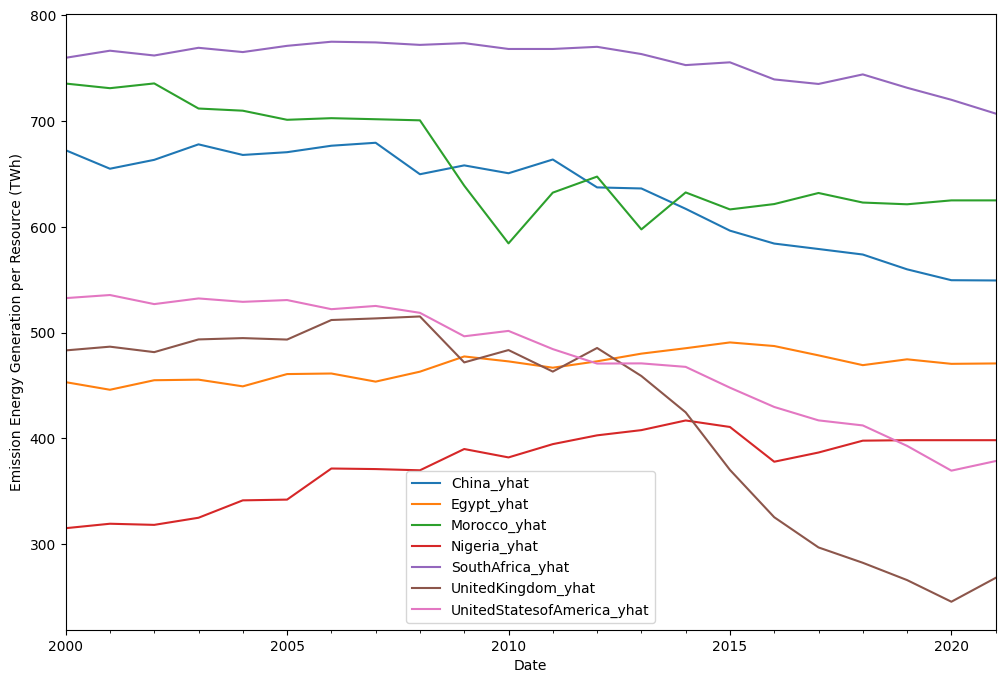

In [4]:
ax = Emission_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Emission Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
plt.show()

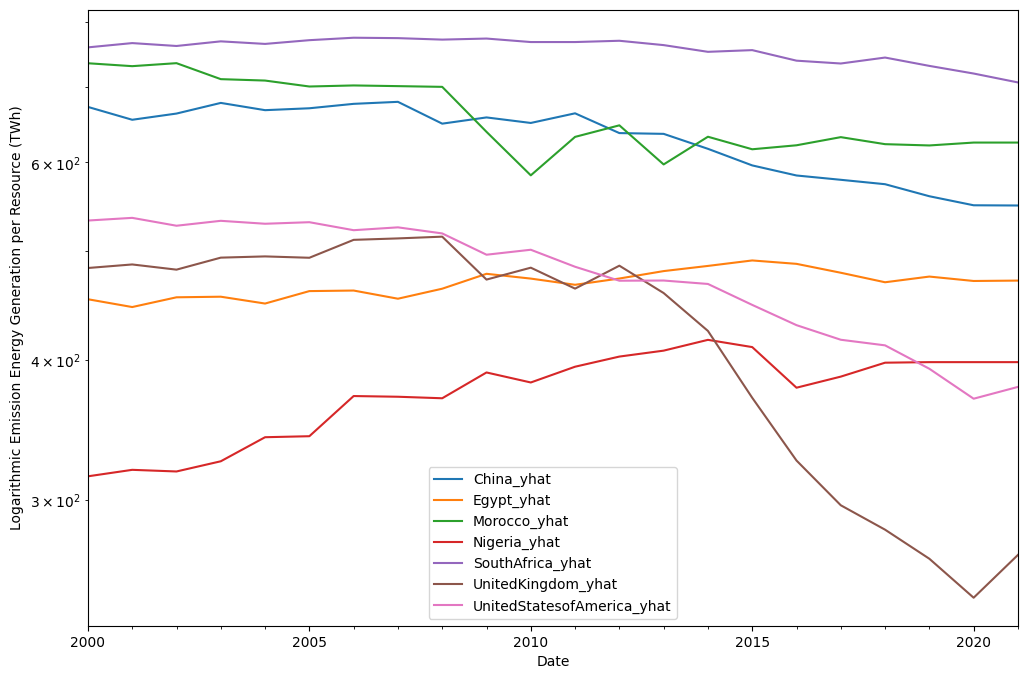

In [5]:
# Make y-axis in log scale
ax = Emission_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Logarithmic Emission Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### Emission's China

In [6]:
Emission_ChinaModel = Prophet()

##### Model Validation


In [7]:
Emission_ChinaValidationModel = Prophet()
columns_to_load = ['ds', 'China_yhat']
dataset_China = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_China = dataset_China.rename(columns={'ds': 'ds',
                        'China_yhat': 'y'})

# Take just the first 15 rows for training
dataset_China_validation = dataset_China[:15]
Emission_ChinaValidationModel.fit(dataset_China_validation)
future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
future_validation = pd.DataFrame({'ds': future_years_validation})
forecast_validation = Emission_ChinaValidationModel.predict(future_validation)

18:57:52 - cmdstanpy - INFO - Chain [1] start processing
18:57:52 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
datasetX = dataset_China[15:]
forecast_validation = forecast_validation[['ds', 'yhat']]

pred = forecast_validation['yhat']
correc = datasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(correc, pred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(correc, pred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((correc - pred) / correc)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

Mean Squared Error: 1230.817
Root Mean Squared Error: 35.083
Mean Absolute Percentage Error: nan


#### Model Training


In [9]:
columns_to_load = ['ds', 'China_yhat']
dataset_China = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_China = dataset_China.rename(columns={'ds': 'ds',
                        'China_yhat': 'y'})
Emission_ChinaModel.fit(dataset_China)

18:57:52 - cmdstanpy - INFO - Chain [1] start processing
18:57:52 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future_years = pd.date_range(start='2022', end='2051', freq='Y')
future = pd.DataFrame({'ds': future_years})
forecast = Emission_ChinaModel.predict(future)

In [11]:
columns_to_load = ['ds', 'yhat']
forecasted_values =forecast.loc[:, columns_to_load]
forecasted_values = forecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Emission_China = pd.concat([dataset_China, forecasted_values], ignore_index=True)
Emission_China = Emission_China.rename(columns={'ds': 'ds', 'y': 'China_yhat'})
Emission_China.head(51)

,ds,China_yhat
0,2000-01-01,672.366000
1,2001-01-01,654.880000
2,2002-01-01,663.277000
3,2003-01-01,677.915000
4,2004-01-01,667.900000
5,2005-01-01,670.506000
6,2006-01-01,676.615000
7,2007-01-01,679.410000
8,2008-01-01,649.673000
9,2009-01-01,658.037000


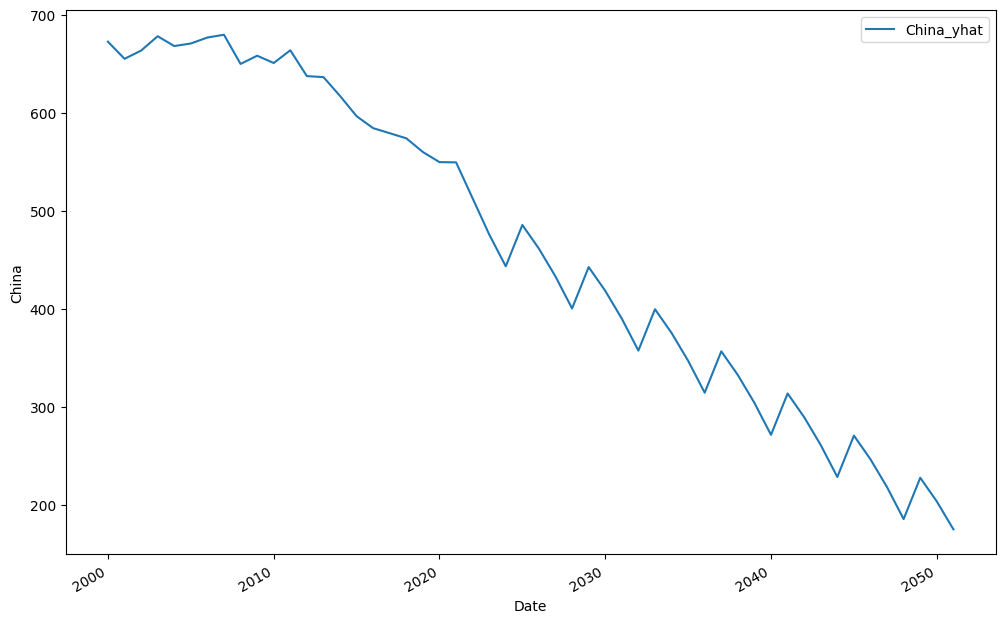

In [12]:
ax = Emission_China.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('China')
ax.set_xlabel('Date')
plt.show()

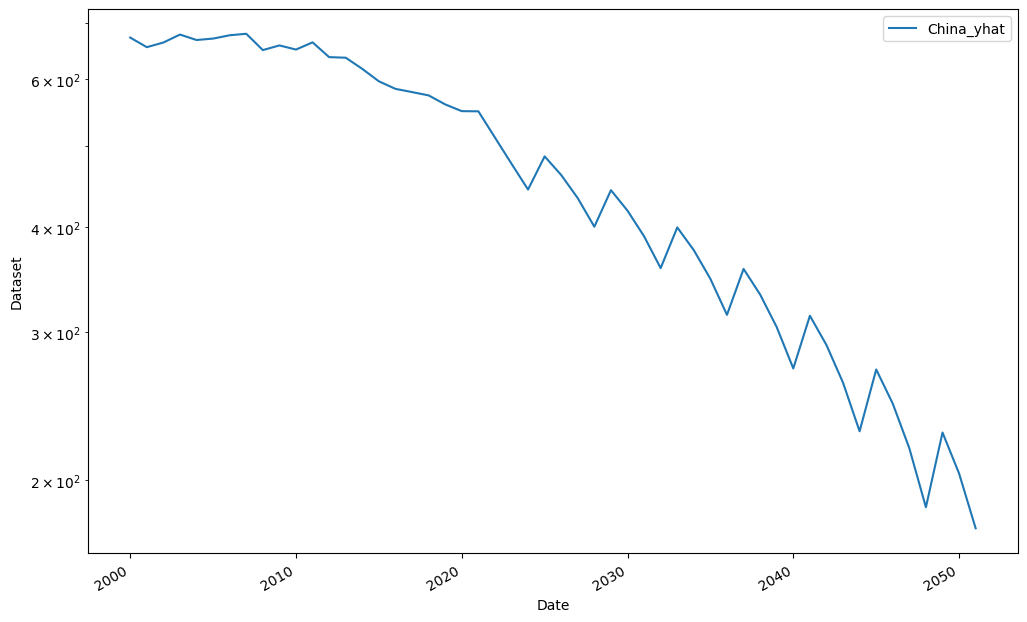

In [13]:
# Make y-axis in log scale
ax = Emission_China.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Dataset')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### Emission Egypt Model

In [14]:
Emission_EgyptModel = Prophet()

Emission_EgyptValidationModel = Prophet()
columns_to_load = ['ds', 'Egypt_yhat']
dataset_Egypt = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_Egypt = dataset_Egypt.rename(columns={'ds': 'ds',
                        'Egypt_yhat': 'y'})

# Take just the first 15 rows for training
dataset_EgyptValidation = dataset_Egypt[:15]
Emission_EgyptValidationModel.fit(dataset_EgyptValidation)
Egypt_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Egypt_future_validation = pd.DataFrame({'ds': Egypt_future_years_validation})
Egypt_forecast_validation = Emission_EgyptValidationModel.predict(Egypt_future_validation)

EgyptdatasetX = dataset_Egypt[15:]
Egypt_forecast_validation = Egypt_forecast_validation[['ds', 'yhat']]

EgyptPred = Egypt_forecast_validation['yhat']
EgyptCorrec = EgyptdatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(EgyptCorrec, EgyptPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(EgyptCorrec, EgyptPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((EgyptCorrec - EgyptPred) / EgyptCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:57:53 - cmdstanpy - INFO - Chain [1] start processing
18:57:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 456.553
Root Mean Squared Error: 21.367
Mean Absolute Percentage Error: nan


In [15]:
columns_to_load = ['ds', 'Egypt_yhat']
dataset_Egypt = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_Egypt = dataset_Egypt.rename(columns={'ds': 'ds',
                        'Egypt_yhat': 'y'})
Emission_EgyptModel.fit(dataset_Egypt)

EgyptFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
EgyptFuture = pd.DataFrame({'ds': EgyptFuture_years})
EgyptForecast = Emission_EgyptModel.predict(EgyptFuture)
columns_to_load = ['ds', 'yhat']
EgyptForecasted_values = EgyptForecast.loc[:, columns_to_load]
EgyptForecasted_values = EgyptForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Emission_Egypt = pd.concat([dataset_Egypt, EgyptForecasted_values], ignore_index=True)
Emission_Egypt = Emission_Egypt.rename(columns={'ds': 'ds', 'y': 'Egypt_yhat'})


18:57:53 - cmdstanpy - INFO - Chain [1] start processing
18:57:53 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
Emission_Egypt.head(51)

,ds,Egypt_yhat
0,2000-01-01,453.203000
1,2001-01-01,446.012000
2,2002-01-01,455.017000
3,2003-01-01,455.570000
4,2004-01-01,449.226000
5,2005-01-01,460.838000
6,2006-01-01,461.370000
7,2007-01-01,453.696000
8,2008-01-01,463.110000
9,2009-01-01,477.482000


#### Emission Morocco 


In [17]:
Emission_MoroccoModel = Prophet()

Emission_MoroccoValidationModel = Prophet()
columns_to_load = ['ds', 'Morocco_yhat']
dataset_Morocco = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_Morocco = dataset_Morocco.rename(columns={'ds': 'ds',
                        'Morocco_yhat': 'y'})

# Take just the first 15 rows for training
dataset_MoroccoValidation = dataset_Morocco[:15]
Emission_MoroccoValidationModel.fit(dataset_MoroccoValidation)
Morocco_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Morocco_future_validation = pd.DataFrame({'ds': Morocco_future_years_validation})
Morocco_forecast_validation = Emission_MoroccoValidationModel.predict(Morocco_future_validation)

MoroccodatasetX = dataset_Morocco[15:]
Morocco_forecast_validation = Morocco_forecast_validation[['ds', 'yhat']]

MoroccoPred = Morocco_forecast_validation['yhat']
MoroccoCorrec = MoroccodatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(MoroccoCorrec, MoroccoPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(MoroccoCorrec, MoroccoPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((MoroccoCorrec - MoroccoPred) / MoroccoCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:57:54 - cmdstanpy - INFO - Chain [1] start processing
18:57:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 1814.667
Root Mean Squared Error: 42.599
Mean Absolute Percentage Error: nan


In [18]:
columns_to_load = ['ds', 'Morocco_yhat']
dataset_Morocco = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_Morocco = dataset_Morocco.rename(columns={'ds': 'ds',
                        'Morocco_yhat': 'y'})
Emission_MoroccoModel.fit(dataset_Morocco)

MoroccoFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
MoroccoFuture = pd.DataFrame({'ds': MoroccoFuture_years})
MoroccoForecast = Emission_MoroccoModel.predict(MoroccoFuture)
columns_to_load = ['ds', 'yhat']
MoroccoForecasted_values = MoroccoForecast.loc[:, columns_to_load]
MoroccoForecasted_values = MoroccoForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Emission_Morocco = pd.concat([dataset_Morocco, MoroccoForecasted_values], ignore_index=True)
Emission_Morocco = Emission_Morocco.rename(columns={'ds': 'ds', 'y': 'Morocco_yhat'})

18:57:54 - cmdstanpy - INFO - Chain [1] start processing
18:57:54 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
Emission_Morocco.head(51)

,ds,Morocco_yhat
0,2000-01-01,735.367000
1,2001-01-01,730.986000
2,2002-01-01,735.488000
3,2003-01-01,711.772000
4,2004-01-01,709.714000
5,2005-01-01,701.119000
6,2006-01-01,702.647000
7,2007-01-01,701.655000
8,2008-01-01,700.611000
9,2009-01-01,638.861000


#### Emission Nigeria

In [20]:
Emission_NigeriaModel = Prophet()

Emission_NigeriaValidationModel = Prophet()
columns_to_load = ['ds', 'Nigeria_yhat']
dataset_Nigeria = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_Nigeria = dataset_Nigeria.rename(columns={'ds': 'ds',
                        'Nigeria_yhat': 'y'})

# Take just the first 15 rows for training
dataset_NigeriaValidation = dataset_Nigeria[:15]
Emission_NigeriaValidationModel.fit(dataset_NigeriaValidation)
Nigeria_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
Nigeria_future_validation = pd.DataFrame({'ds': Nigeria_future_years_validation})
Nigeria_forecast_validation = Emission_NigeriaValidationModel.predict(Nigeria_future_validation)

NigeriadatasetX = dataset_Nigeria[15:]
Nigeria_forecast_validation = Nigeria_forecast_validation[['ds', 'yhat']]

NigeriaPred = Nigeria_forecast_validation['yhat']
NigeriaCorrec = NigeriadatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(NigeriaCorrec, NigeriaPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(NigeriaCorrec, NigeriaPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((NigeriaCorrec - NigeriaPred) / NigeriaCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:57:54 - cmdstanpy - INFO - Chain [1] start processing
18:57:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 4609.442
Root Mean Squared Error: 67.893
Mean Absolute Percentage Error: nan


In [21]:
columns_to_load = ['ds', 'Nigeria_yhat']
dataset_Nigeria = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_Nigeria = dataset_Nigeria.rename(columns={'ds': 'ds',
                        'Nigeria_yhat': 'y'})
Emission_NigeriaModel.fit(dataset_Nigeria)

NigeriaFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
NigeriaFuture = pd.DataFrame({'ds': NigeriaFuture_years})
NigeriaForecast = Emission_NigeriaModel.predict(NigeriaFuture)
columns_to_load = ['ds', 'yhat']
NigeriaForecasted_values = NigeriaForecast.loc[:, columns_to_load]
NigeriaForecasted_values = NigeriaForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Emission_Nigeria = pd.concat([dataset_Nigeria, NigeriaForecasted_values], ignore_index=True)
Emission_Nigeria = Emission_Nigeria.rename(columns={'ds': 'ds', 'y': 'Nigeria_yhat'})

18:57:55 - cmdstanpy - INFO - Chain [1] start processing
18:57:55 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
Emission_Nigeria.head(51)

,ds,Nigeria_yhat
0,2000-01-01,315.194000
1,2001-01-01,319.407000
2,2002-01-01,318.336000
3,2003-01-01,325.065000
4,2004-01-01,341.505000
5,2005-01-01,342.210000
6,2006-01-01,371.597000
7,2007-01-01,371.063000
8,2008-01-01,369.911000
9,2009-01-01,390.011000


#### Emission SouthAfrica

In [23]:
Emission_SouthAfricaModel = Prophet()

Emission_SouthAfricaValidationModel = Prophet()
columns_to_load = ['ds', 'SouthAfrica_yhat']
dataset_SouthAfrica = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_SouthAfrica = dataset_SouthAfrica.rename(columns={'ds': 'ds',
                        'SouthAfrica_yhat': 'y'})

# Take just the first 15 rows for training
dataset_SouthAfricaValidation = dataset_SouthAfrica[:15]
Emission_SouthAfricaValidationModel.fit(dataset_SouthAfricaValidation)
SouthAfrica_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
SouthAfrica_future_validation = pd.DataFrame({'ds': SouthAfrica_future_years_validation})
SouthAfrica_forecast_validation = Emission_SouthAfricaValidationModel.predict(SouthAfrica_future_validation)

SouthAfricadatasetX = dataset_SouthAfrica[15:]
SouthAfrica_forecast_validation = SouthAfrica_forecast_validation[['ds', 'yhat']]

SouthAfricaPred = SouthAfrica_forecast_validation['yhat']
SouthAfricaCorrec = SouthAfricadatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(SouthAfricaCorrec, SouthAfricaPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(SouthAfricaCorrec, SouthAfricaPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((SouthAfricaCorrec - SouthAfricaPred) / SouthAfricaCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:57:55 - cmdstanpy - INFO - Chain [1] start processing
18:57:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 184.998
Root Mean Squared Error: 13.601
Mean Absolute Percentage Error: nan


In [24]:
columns_to_load = ['ds', 'SouthAfrica_yhat']
dataset_SouthAfrica = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_SouthAfrica = dataset_SouthAfrica.rename(columns={'ds': 'ds',
                        'SouthAfrica_yhat': 'y'})
Emission_SouthAfricaModel.fit(dataset_SouthAfrica)

SouthAfricaFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
SouthAfricaFuture = pd.DataFrame({'ds': SouthAfricaFuture_years})
SouthAfricaForecast = Emission_SouthAfricaModel.predict(SouthAfricaFuture)
columns_to_load = ['ds', 'yhat']
SouthAfricaForecasted_values = SouthAfricaForecast.loc[:, columns_to_load]
SouthAfricaForecasted_values = SouthAfricaForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Emission_SouthAfrica = pd.concat([dataset_SouthAfrica, SouthAfricaForecasted_values], ignore_index=True)
Emission_SouthAfrica = Emission_SouthAfrica.rename(columns={'ds': 'ds', 'y': 'SouthAfrica_yhat'})

18:57:55 - cmdstanpy - INFO - Chain [1] start processing
18:57:55 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
Emission_SouthAfrica.head(51)

,ds,SouthAfrica_yhat
0,2000-01-01,759.709000
1,2001-01-01,766.409000
2,2002-01-01,761.874000
3,2003-01-01,769.153000
4,2004-01-01,765.116000
5,2005-01-01,771.006000
6,2006-01-01,774.894000
7,2007-01-01,774.239000
8,2008-01-01,771.902000
9,2009-01-01,773.575000


#### Emission UnitedKingdom

In [26]:
Emission_UnitedKingdomModel = Prophet()

Emission_UnitedKingdomValidationModel = Prophet()
columns_to_load = ['ds', 'UnitedKingdom_yhat']
dataset_UnitedKingdom = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_UnitedKingdom = dataset_UnitedKingdom.rename(columns={'ds': 'ds',
                        'UnitedKingdom_yhat': 'y'})

# Take just the first 15 rows for training
dataset_UnitedKingdomValidation = dataset_UnitedKingdom[:15]
Emission_UnitedKingdomValidationModel.fit(dataset_UnitedKingdomValidation)
UnitedKingdom_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
UnitedKingdom_future_validation = pd.DataFrame({'ds': UnitedKingdom_future_years_validation})
UnitedKingdom_forecast_validation = Emission_UnitedKingdomValidationModel.predict(UnitedKingdom_future_validation)

UnitedKingdomdatasetX = dataset_UnitedKingdom[15:]
UnitedKingdom_forecast_validation = UnitedKingdom_forecast_validation[['ds', 'yhat']]

UnitedKingdomPred = UnitedKingdom_forecast_validation['yhat']
UnitedKingdomCorrec = UnitedKingdomdatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(UnitedKingdomCorrec, UnitedKingdomPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(UnitedKingdomCorrec, UnitedKingdomPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((UnitedKingdomCorrec - UnitedKingdomPred) / UnitedKingdomCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:57:56 - cmdstanpy - INFO - Chain [1] start processing
18:57:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 26385.361
Root Mean Squared Error: 162.436
Mean Absolute Percentage Error: nan


In [27]:
columns_to_load = ['ds', 'UnitedKingdom_yhat']
dataset_UnitedKingdom = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_UnitedKingdom = dataset_UnitedKingdom.rename(columns={'ds': 'ds',
                        'UnitedKingdom_yhat': 'y'})
Emission_UnitedKingdomModel.fit(dataset_UnitedKingdom)

UnitedKingdomFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
UnitedKingdomFuture = pd.DataFrame({'ds': UnitedKingdomFuture_years})
UnitedKingdomForecast = Emission_UnitedKingdomModel.predict(UnitedKingdomFuture)
columns_to_load = ['ds', 'yhat']
UnitedKingdomForecasted_values = UnitedKingdomForecast.loc[:, columns_to_load]
UnitedKingdomForecasted_values = UnitedKingdomForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Emission_UnitedKingdom = pd.concat([dataset_UnitedKingdom, UnitedKingdomForecasted_values], ignore_index=True)
Emission_UnitedKingdom = Emission_UnitedKingdom.rename(columns={'ds': 'ds', 'y': 'UnitedKingdom_yhat'})

18:57:56 - cmdstanpy - INFO - Chain [1] start processing
18:57:56 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
Emission_UnitedKingdom.head(51)

,ds,UnitedKingdom_yhat
0,2000-01-01,483.199000
1,2001-01-01,486.728000
2,2002-01-01,481.565000
3,2003-01-01,493.577000
4,2004-01-01,494.825000
5,2005-01-01,493.450000
6,2006-01-01,511.920000
7,2007-01-01,513.436000
8,2008-01-01,515.279000
9,2009-01-01,471.856000


### Emission USA

In [29]:
Emission_UnitedStatesofAmericaModel = Prophet()

Emission_UnitedStatesofAmericaValidationModel = Prophet()
columns_to_load = ['ds', 'UnitedStatesofAmerica_yhat']
dataset_UnitedStatesofAmerica = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_UnitedStatesofAmerica = dataset_UnitedStatesofAmerica.rename(columns={'ds': 'ds',
                        'UnitedStatesofAmerica_yhat': 'y'})

# Take just the first 15 rows for training
dataset_UnitedStatesofAmericaValidation = dataset_UnitedStatesofAmerica[:15]
Emission_UnitedStatesofAmericaValidationModel.fit(dataset_UnitedStatesofAmericaValidation)
UnitedStatesofAmerica_future_years_validation = pd.date_range(start='2015', end='2022', freq='Y')
UnitedStatesofAmerica_future_validation = pd.DataFrame({'ds': UnitedStatesofAmerica_future_years_validation})
UnitedStatesofAmerica_forecast_validation = Emission_UnitedStatesofAmericaValidationModel.predict(UnitedStatesofAmerica_future_validation)

UnitedStatesofAmericadatasetX = dataset_UnitedStatesofAmerica[15:]
UnitedStatesofAmerica_forecast_validation = UnitedStatesofAmerica_forecast_validation[['ds', 'yhat']]

UnitedStatesofAmericaPred = UnitedStatesofAmerica_forecast_validation['yhat']
UnitedStatesofAmericaCorrec = UnitedStatesofAmericadatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(UnitedStatesofAmericaCorrec, UnitedStatesofAmericaPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(UnitedStatesofAmericaCorrec, UnitedStatesofAmericaPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((UnitedStatesofAmericaCorrec - UnitedStatesofAmericaPred) / UnitedStatesofAmericaCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:57:56 - cmdstanpy - INFO - Chain [1] start processing
18:57:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 260.349
Root Mean Squared Error: 16.135
Mean Absolute Percentage Error: nan


In [30]:
columns_to_load = ['ds', 'UnitedStatesofAmerica_yhat']
dataset_UnitedStatesofAmerica = pd.read_excel('Emission_Dataset.xlsx', usecols=columns_to_load)
dataset_UnitedStatesofAmerica = dataset_UnitedStatesofAmerica.rename(columns={'ds': 'ds',
                        'UnitedStatesofAmerica_yhat': 'y'})
Emission_UnitedStatesofAmericaModel.fit(dataset_UnitedStatesofAmerica)

UnitedStatesofAmericaFuture_years = pd.date_range(start='2022', end='2051', freq='Y')
UnitedStatesofAmericaFuture = pd.DataFrame({'ds': UnitedStatesofAmericaFuture_years})
UnitedStatesofAmericaForecast = Emission_UnitedStatesofAmericaModel.predict(UnitedStatesofAmericaFuture)
columns_to_load = ['ds', 'yhat']
UnitedStatesofAmericaForecasted_values = UnitedStatesofAmericaForecast.loc[:, columns_to_load]
UnitedStatesofAmericaForecasted_values = UnitedStatesofAmericaForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Emission_UnitedStatesofAmerica = pd.concat([dataset_UnitedStatesofAmerica, UnitedStatesofAmericaForecasted_values], ignore_index=True)
Emission_UnitedStatesofAmerica = Emission_UnitedStatesofAmerica.rename(columns={'ds': 'ds', 'y': 'UnitedStatesofAmerica_yhat'})

18:57:57 - cmdstanpy - INFO - Chain [1] start processing
18:57:57 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
Emission_UnitedStatesofAmerica.head(51)

,ds,UnitedStatesofAmerica_yhat
0,2000-01-01,532.606000
1,2001-01-01,535.533000
2,2002-01-01,526.956000
3,2003-01-01,532.299000
4,2004-01-01,529.099000
5,2005-01-01,530.787000
6,2006-01-01,522.156000
7,2007-01-01,525.213000
8,2008-01-01,518.707000
9,2009-01-01,496.546000


In [32]:
FullEmissionData = pd.merge(Emission_China, Emission_Egypt, on='ds')
FullEmissionData = pd.merge(FullEmissionData, Emission_Morocco, on='ds')
FullEmissionData = pd.merge(FullEmissionData, Emission_Nigeria, on='ds')
FullEmissionData = pd.merge(FullEmissionData, Emission_SouthAfrica, on='ds')
FullEmissionData = pd.merge(FullEmissionData, Emission_UnitedKingdom, on='ds')
FullEmissionData = pd.merge(FullEmissionData, Emission_UnitedStatesofAmerica, on='ds')
FullEmissionData.rename(columns={'ds': 'ds', 'China_yhat': 'China', 'Egypt_yhat': 'Egypt', 'Morocco_yhat': 'Morocco', 'Nigeria_yhat': 'Nigeria', 'SouthAfrica_yhat': 'SouthAfrica', 'UnitedKingdom_yhat': 'UnitedKingdom','UnitedStatesofAmerica_yhat': 'UnitedStatesofAmerica'}, inplace=True)
FullEmissionData.head(51)

,ds,China,Egypt,Morocco,Nigeria,SouthAfrica,UnitedKingdom,UnitedStatesofAmerica
0,2000-01-01,672.366000,453.203000,735.367000,315.194000,759.709000,483.199000,532.606000
1,2001-01-01,654.880000,446.012000,730.986000,319.407000,766.409000,486.728000,535.533000
2,2002-01-01,663.277000,455.017000,735.488000,318.336000,761.874000,481.565000,526.956000
3,2003-01-01,677.915000,455.570000,711.772000,325.065000,769.153000,493.577000,532.299000
4,2004-01-01,667.900000,449.226000,709.714000,341.505000,765.116000,494.825000,529.099000
5,2005-01-01,670.506000,460.838000,701.119000,342.210000,771.006000,493.450000,530.787000
6,2006-01-01,676.615000,461.370000,702.647000,371.597000,774.894000,511.920000,522.156000
7,2007-01-01,679.410000,453.696000,701.655000,371.063000,774.239000,513.436000,525.213000
8,2008-01-01,649.673000,463.110000,700.611000,369.911000,771.902000,515.279000,518.707000
9,2009-01-01,658.037000,477.482000,638.861000,390.011000,773.575000,471.856000,496.546000


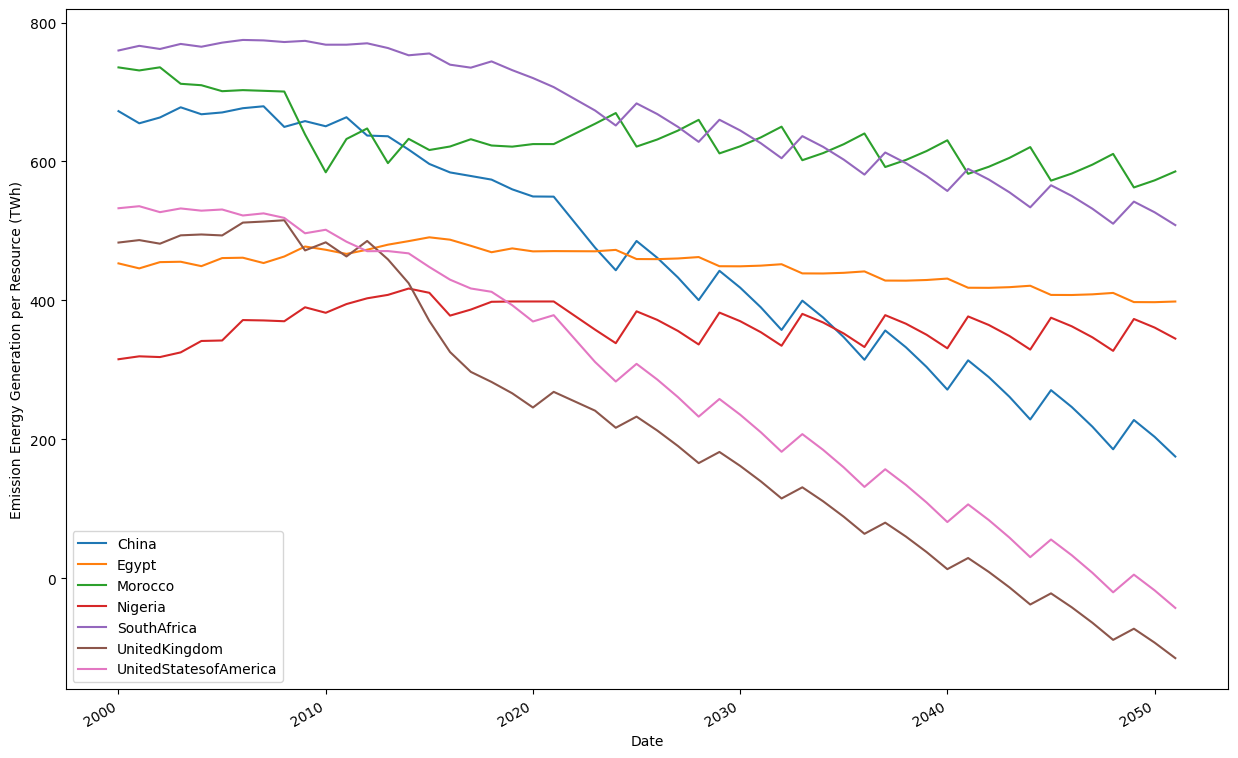

In [33]:
EmissionPlot = FullEmissionData.set_index('ds').plot(figsize=(15, 10))
EmissionPlot.set_ylabel('Emission Energy Generation per Resource (TWh)')
EmissionPlot.set_xlabel('Date')  
plt.show()

In [34]:
Emission_file_name = 'Predicted_Emission_Dataset.xlsx'
FullEmissionData.to_excel(Emission_file_name, index=False)